In [1]:
### Import Necessary Packages ###

import ROOT 
import numpy as np
from root_numpy import root2array, tree2array, rec2array
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Welcome to JupyROOT 6.10/04


In [2]:
### Choose User Inputs ###

# CATEGORIES: 
# 'is_passed_ttHhad' = 0
# 'is_passed_ttHhad_4jet1bjet' = 1
# 'is_passed_ttHhad_4jet2bjet' = 2 
# 'is_passed_ttHhad_5jet1bjet' = 3
# 'is_passed_ttHhad_5jet2bjet' = 4
# 'is_passed_ttHhad_6jet1bjet' = 5
# 'is_passed_ttHhad_6jet2bjet' = 6
# 'is_passed_tHlep_0fwd' = 7
# 'is_passed_tHlep_1fwd' = 8
# 'is_passed_ttHlep' = 9
# 'is_passed_ttHhad_bdt1' = 10 
# 'is_passed_ttHhad_bdt2' = 11
# 'is_passed_ttHhad_bdt3' = 12
# 'is_passed_ttHhad_bdt4' = 13
# 'is_passed_tHhad_bdt' = 14
# 'is_passed_ttHlep_bdt1' = 15
# 'is_passed_ttHlep_bdt2' = 16
# 'is_passed_tHlep_bdt1' = 17
# 'is_passed_tHlep_bdt2' = 18

whichCat = 13

In [3]:
### Import the Data File and MC Files ###

inputDir = 'inputTrees/'

in_MC_FileNames = [	"yyMC" , # Sherpa yy MC - 0 
                    "PowhegPy8_NNLOPS_ggH125" , # ggH - 1
					"PowhegPy8_NNPDF30_VBFH125" , # VBF - 2
					"PowhegPy8_ZH125J" , # ZH (VH) - 3 
					"PowhegPy8_WmH125J" , # W-H (VH) - 4 
					"PowhegPy8_WpH125J" , # W+H (VH) - 5 
					"aMCnloPy8_bbH125_yb2" , # bbH - 6
					"aMCnloPy8_bbH125_ybyt" , # bbH - 7
					"MGPy8_tHjb125_yt_plus1" , # tH - 8
					"aMCnloHwpp_tWH125_yt_plus1" , # tH - 9  
					"aMCnloPy8_ttH125" ] # ttH - 10 

in_Data_FileName = 'data2016'

in_MC_Files = []
for fileName in in_MC_FileNames: in_MC_Files.append( ROOT.TFile.Open( inputDir+fileName+'.root' ) )

in_Data_File = ROOT.TFile.Open( inputDir+in_Data_FileName+'.root' )


### Get the Trees ###

inTreeName = 'ttHyyTree'

in_MC_Trees = []
for file in in_MC_Files: in_MC_Trees.append( file.Get( inTreeName ) )

in_Data_Tree = in_Data_File.Get( inTreeName )


Warning in <TClass::Init>: no dictionary for class xAOD::EventFormat_v1 is available


In [4]:
### Convert Data to Numpy NDArray ###

branches2read = [ 'is_passed_ttHhad' ,  
                  'is_passed_ttHhad_4jet1bjet' , 'is_passed_ttHhad_4jet2bjet' , 
                  'is_passed_ttHhad_5jet1bjet' , 'is_passed_ttHhad_5jet2bjet' ,
                  'is_passed_ttHhad_6jet1bjet' , 'is_passed_ttHhad_6jet2bjet' ,
                  'is_passed_tHlep_0fwd' , 'is_passed_tHlep_1fwd' , 'is_passed_ttHlep' , 
                  'is_passed_ttHhad_bdt1' , 'is_passed_ttHhad_bdt2' , 
                  'is_passed_ttHhad_bdt3' , 'is_passed_ttHhad_bdt4' , 'is_passed_tHhad_bdt' , 
                  'is_passed_ttHlep_bdt1' , 'is_passed_ttHlep_bdt2' , 
                  'is_passed_tHlep_bdt1' , 'is_passed_tHlep_bdt2' ,
                  'cosTS_yy' , 'DR_y_y' , 'DRmin_y_j' , 'm_alljet_30' , 'pTlepMET' , 'n_bjets30' , 
                  'n_electrons' , 'n_muons' , 'm_ll' ,
                  'y1_pt' , 'y2_pt' ]
#                   'y1_eta' , 'y2_eta' ,
#                   'y1_ptcone20-0.05*y1_pt' , 'y2_ptcone20-0.05*y2_pt' ,
#                   'y1_topoetcone20-0.065*y1_pt' , 'y2_topoetcone20-0.065*y2_pt' ,
#                   'j1_pt' , 'j2_pt' , 'j3_pt' , 'j4_pt' , 'j5_pt' , 'j6_pt' ,
#                   'j1_eta' , 'j2_eta' , 'j3_eta' , 'j4_eta' , 'j5_eta' , 'j6_eta' 

   # 0-18 are "is_passed_XXX" while 19+ are other variables 

selection2apply = 'y1_is_tight&&y2_is_tight&&y1_is_isolated&&y2_is_isolated&&(m_yy<120||m_yy>130)'

### Data ###

data_StrucArray = tree2array( in_Data_Tree ,
                        branches = branches2read,
                        selection = selection2apply )
                        #start=0, stop=500000, step=1)

data_Array = rec2array( data_StrucArray )

### Monte Carlo ### 

mc_StrucArrays = []
mc_Arrays = []
for tree in in_MC_Trees: 
    mc_StrucArrays.append( tree2array( tree ,
                            branches = branches2read,
                            selection = selection2apply ) )
    mc_Arrays.append( rec2array( mc_StrucArrays[-1] ) )


In [5]:
### Normalize the Columns in the Array ### 

scaled_mcArrays = []
labels = []

for i,array in enumerate(mc_Arrays): 
    if( len( array[array[:,whichCat]==1] ) > 0 ): 
        scaled_mcArrays.append( scale( array[:,19:][array[:,whichCat]==1] ) )
        labels.append( in_MC_FileNames[i] )

scaled_DataArray = scale( data_Array[:,19:][data_Array[:,whichCat]==1] )
labels.append( "2016 Data" )

In [6]:
### Apply Clustering ### 

if( len(scaled_DataArray) <= 2 ): nClusters = 1
elif( len(scaled_DataArray) <= 5 ): nClusters = len(scaled_DataArray) - 1
else: nClusters = 5
    
dataPCA = PCA(n_components=2)
dataPCA.fit( scaled_DataArray[:] )
reduced_Data = dataPCA.transform( scaled_DataArray[:] )

clusterData = KMeans(init='k-means++', n_clusters=nClusters, n_init=100 )
clusterData.fit( reduced_Data )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
### OPTIONAL: Determine Best Number of Clusters ### 

# nClusters = np.linspace(1,10,dtype='int')
# clusterScores = []

# for n in nClusters: 
#     testKMeans = KMeans(init='k-means++', n_clusters=n, n_init=100 )
#     testKMeans.fit( reduced_Data )
#     clusterScores.append( -testKMeans.score(reduced_Data) )

# plt.figure(2)
# plt.plot( nClusters , clusterScores )
# plt.show()

In [8]:
### Apply PCA From Data To MC ### 

reduced_mcArrays = []
for array in scaled_mcArrays: 
    reduced_mcArrays.append( dataPCA.transform( array ) )


In [9]:
### Make a Mesh Grid to Show Predicted Regions ###

gridSize = .01 

xMin = reduced_Data[:, 0].min() - 1
xMax = reduced_Data[:, 0].max() + 1
yMin = reduced_Data[:, 1].min() - 1 
yMax = reduced_Data[:, 1].max() + 1
xGrid, yGrid = np.meshgrid( np.arange( xMin, xMax, gridSize ) , np.arange( yMin, yMax, gridSize ) )

regions = clusterData.predict( np.c_[ xGrid.ravel() , yGrid.ravel() ] ) 
regions = regions.reshape( xGrid.shape )

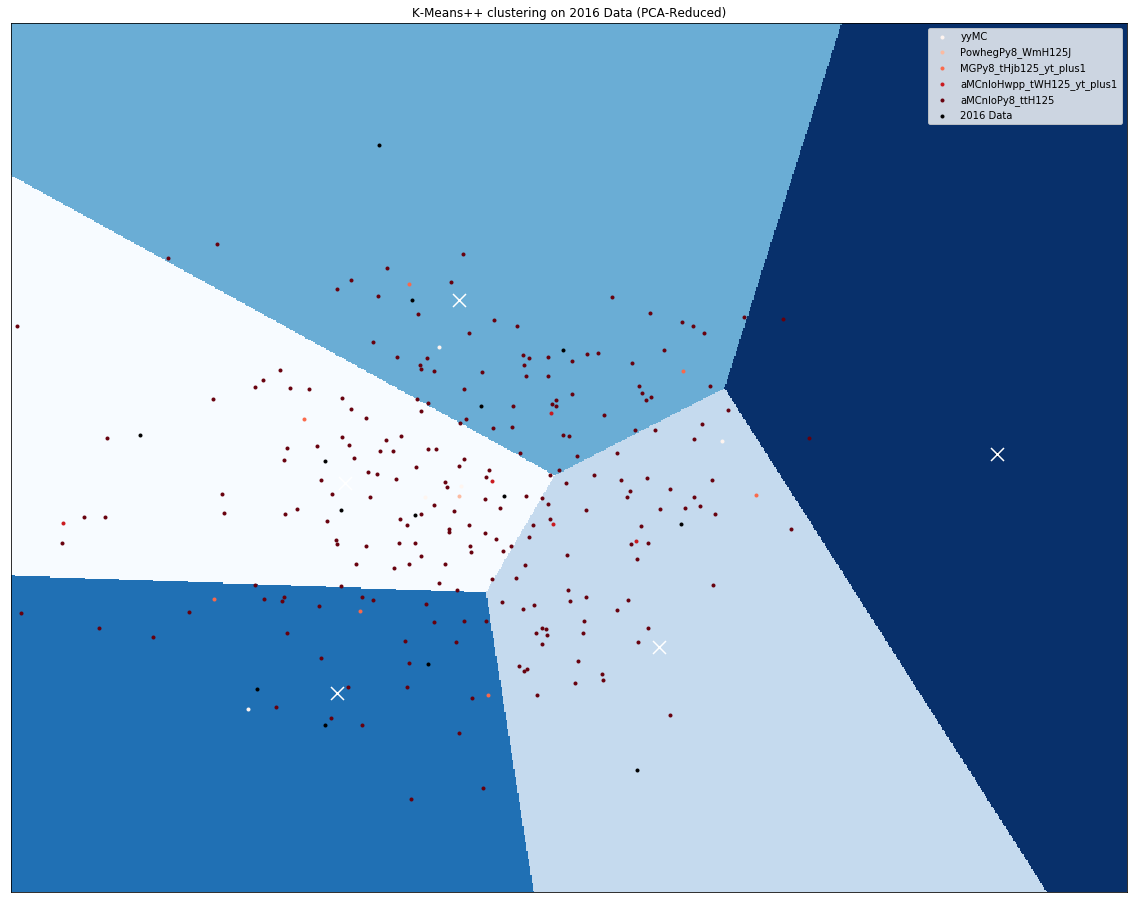

In [10]:
### Plot the Regions and the Data ### 

# Regions
plt.figure(num=1,figsize=[20,16])
plt.clf()
plt.imshow(regions, interpolation='nearest',
           extent=(xGrid.min(), xGrid.max(), yGrid.min(), yGrid.max()),
           #cmap=plt.cm.Paired,
           cmap=plt.get_cmap('Blues'),
           aspect='auto', origin='lower')

nColors = len( reduced_mcArrays )
colorList = plt.cm.Reds(np.linspace(0, 1, nColors))
for i,array in enumerate(reduced_mcArrays): 
    plt.scatter(   array[:,0] , 
                   array[:,1] , 
                   color = colorList[i] , 
                   marker = '.' )

# All Data 
plt.scatter(  reduced_Data[:,0] , 
              reduced_Data[:,1] , 
              color = 'k',
              marker = '.')


#Region Centers as a white X
centroids = clusterData.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.legend(labels)

plt.title('K-Means++ clustering on 2016 Data (PCA-Reduced)')
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
plt.xticks(())
plt.yticks(())
plt.show()